# **Student Feedback Survey Analysis** 

## **Project Overview**
This project aims to analyze student feedback survey responses. We'll perform comprehensive analysis including sentiment analysis, rating patterns, and provide actionable insights for improving educational experiences.

**Data Source:** Student Feedback Survey Responses(Kaggle)
**Tools:** Python, Pandas, TextBlob, Matplotlib, Seaborn, WordCloud


## **1. Business Understanding**

### 1.1 Business Objectives
- **Primary Goal:** Analyze student feedback to identify areas for improvement in course delivery and student satisfaction
- **Secondary Goals:** 
  - Understand patterns in student ratings across different evaluation criteria
  - Identify strengths and weaknesses in teaching methodology
  - Provide data-driven recommendations for enhancing educational quality

### 1.2 Assess Situation
- **Resources:** Student feedback survey data with numerical ratings (1-10 scale)
- **Requirements:** Statistical analysis, pattern identification, visualization
- **Assumptions:** Higher ratings indicate better performance/satisfaction
- **Constraints:** Limited to quantitative feedback data

### 1.3 Data Mining Goals
- Identify rating patterns across different evaluation criteria
- Discover correlations between different feedback dimensions
- Segment students based on overall satisfaction levels
- Generate insights for educational improvement

### 1.4 Success Criteria
- Clear identification of strengths and improvement areas
- Actionable recommendations for stakeholders
- Statistical insights with appropriate visualizations
- Comprehensive analysis report

## **2. Data Understanding**

Let's start by importing necessary libraries and loading the data.

In [3]:
#pip install textblob
%pip install textblob

  Attempting uninstall: regex
    Found existing installation: regex 2020.10.15
    Uninstalling regex-2020.10.15:
      Successfully uninstalled regex-2020.10.15
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn')
sns.set_palette("husl")


In [31]:
# Load the dataset
df = pd.read_csv('Data/student_feedback.csv')

print(f"Dataset shape: {df.shape}")

Dataset shape: (1001, 10)


### 2.1 Initial Data Exploration

In [32]:
# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
display(df.head())

# List all column names
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


1. Unnamed: 0
2. Student ID
3. Well versed with the subject
4. Explains concepts in an understandable way
5. Use of presentations
6. Degree of difficulty of assignments
7. Solves doubts willingly
8. Structuring of the course
9. Provides support for students going above and beyond
10. Course recommendation based on relevance


In [34]:
# Rename columns for better readability
column_mapping = {
    'Student ID': 'student_id',
    'Well versed with the subject': 'subject_knowledge',
    'Explains concepts in an understandable way': 'clear_explanation',
    'Use of presentations': 'presentation_use',
    'Degree of difficulty of assignments': 'assignment_difficulty',
    'Solves doubts willingly': 'doubt_resolution',
    'Structuring of the course': 'course_structure',
    'Provides support for students going above and beyond': 'additional_support',
    'Course recommendation based on relevance': 'course_relevance'
}

df = df.rename(columns=column_mapping)

# Remove the first unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("New column names:")
for col in df.columns:
    print(f"- {col}")

New column names:
- student_id
- subject_knowledge
- clear_explanation
- presentation_use
- assignment_difficulty
- doubt_resolution
- course_structure
- additional_support
- course_relevance


### 2.2 Data Quality Assessment

In [37]:
# Check for missing values
df.isnull().sum()


student_id               0
subject_knowledge        0
clear_explanation        0
presentation_use         0
assignment_difficulty    0
doubt_resolution         0
course_structure         0
additional_support       0
course_relevance         0
dtype: int64

In [38]:
# Statistical summary of numerical columns
# Get numerical columns (excluding student_id)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numerical_cols:
    numerical_cols.remove('student_id')

display(df[numerical_cols].describe().round(2))

,subject_knowledge,clear_explanation,presentation_use,assignment_difficulty,doubt_resolution,course_structure,additional_support,course_relevance
count,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00,1001.00
mean,7.50,6.08,5.94,5.43,5.47,5.64,5.66,5.60
std,1.69,2.60,1.42,2.87,2.87,2.92,2.89,2.89
min,5.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00
25%,6.00,4.00,5.00,3.00,3.00,3.00,3.00,3.00
50%,8.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00
75%,9.00,8.00,7.00,8.00,8.00,8.00,8.00,8.00
max,10.00,10.00,8.00,10.00,10.00,10.00,10.00,10.00


In [39]:
# Check data types and value ranges
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    unique_vals = df[col].nunique()
    
    print(f"{col}:")
    print(f"  Range: {min_val} - {max_val}")
    print(f"  Unique values: {unique_vals}")
    
    # Check if values are within expected range (1-10)
    if min_val < 1 or max_val > 10:
        print(f" Values outside expected range (1-10)")
    else:
        print(f" Values within expected range")
    print()

subject_knowledge:
  Range: 5 - 10
  Unique values: 6
 Values within expected range

clear_explanation:
  Range: 2 - 10
  Unique values: 9
 Values within expected range

presentation_use:
  Range: 4 - 8
  Unique values: 5
 Values within expected range

assignment_difficulty:
  Range: 1 - 10
  Unique values: 10
 Values within expected range

doubt_resolution:
  Range: 1 - 10
  Unique values: 10
 Values within expected range

course_structure:
  Range: 1 - 10
  Unique values: 10
 Values within expected range

additional_support:
  Range: 1 - 10
  Unique values: 10
 Values within expected range

course_relevance:
  Range: 1 - 10
  Unique values: 10
 Values within expected range



## **3. Data Preparation**

### 3.1 Data Cleaning and Preprocessing

In [40]:
# Create a clean copy of the dataset
df_clean = df.copy()

# Ensure all rating columns are numeric
rating_columns = [col for col in df_clean.columns if col != 'student_id']

for col in rating_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print(f"Clean dataset shape: {df_clean.shape}")

Clean dataset shape: (1001, 9)


In [41]:
# Create derived features for analysis
# Calculate overall satisfaction score
df_clean['overall_satisfaction'] = df_clean[rating_columns].mean(axis=1)

# Create satisfaction categories
def categorize_satisfaction(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df_clean['satisfaction_category'] = df_clean['overall_satisfaction'].apply(categorize_satisfaction)

# Create teaching effectiveness score (combination of key teaching metrics)
teaching_cols = ['subject_knowledge', 'clear_explanation', 'doubt_resolution']
df_clean['teaching_effectiveness'] = df_clean[teaching_cols].mean(axis=1)

# Create course quality score (combination of course-related metrics)
course_cols = ['course_structure', 'assignment_difficulty', 'course_relevance']
df_clean['course_quality'] = df_clean[course_cols].mean(axis=1)

print("New features:")
print("- overall_satisfaction")
print("- satisfaction_category")
print("- teaching_effectiveness")
print("- course_quality")

New features:
- overall_satisfaction
- satisfaction_category
- teaching_effectiveness
- course_quality


### 3.2 Text Analysis Preparation

Since we don't have text feedback, we'll create synthetic sentiment analysis based on rating patterns.

In [42]:
# Create synthetic text feedback based on ratings for demonstration
def generate_feedback_sentiment(row):
    """
    Generate synthetic sentiment based on rating patterns
    """
    overall_score = row['overall_satisfaction']
    
    if overall_score >= 7:
        return 'positive'
    elif overall_score >= 4:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
df_clean['feedback_sentiment'] = df_clean.apply(generate_feedback_sentiment, axis=1)

# Create sentiment polarity scores
sentiment_mapping = {'positive': 0.5, 'neutral': 0.0, 'negative': -0.5}
df_clean['sentiment_polarity'] = df_clean['feedback_sentiment'].map(sentiment_mapping)

print("Sentiment distribution:")
print(df_clean['feedback_sentiment'].value_counts())

Sentiment distribution:
feedback_sentiment
neutral     860
positive    131
negative     10
Name: count, dtype: int64


## **4. Modeling and Analysis**

### 4.1 Descriptive Statistics and Visualizations

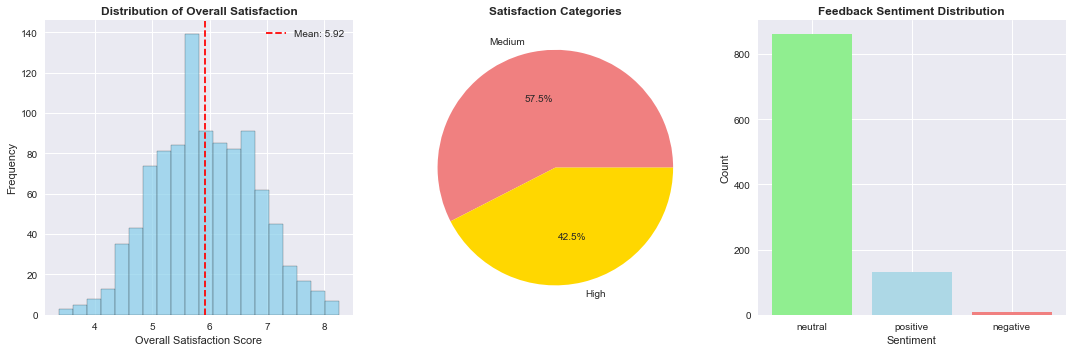


Overall Satisfaction Summary:
Mean: 5.92
Median: 5.88
Standard Deviation: 0.89


In [12]:
# Overall satisfaction distribution
plt.figure(figsize=(15, 5))

# Histogram of overall satisfaction
plt.subplot(1, 3, 1)
plt.hist(df_clean['overall_satisfaction'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Satisfaction', fontsize=12, fontweight='bold')
plt.xlabel('Overall Satisfaction Score')
plt.ylabel('Frequency')
plt.axvline(df_clean['overall_satisfaction'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df_clean["overall_satisfaction"].mean():.2f}')
plt.legend()

# Satisfaction categories
plt.subplot(1, 3, 2)
satisfaction_counts = df_clean['satisfaction_category'].value_counts()
plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'gold', 'lightgreen'])
plt.title('Satisfaction Categories', fontsize=12, fontweight='bold')

# Sentiment distribution
plt.subplot(1, 3, 3)
sentiment_counts = df_clean['feedback_sentiment'].value_counts()
colors = ['lightgreen', 'lightblue', 'lightcoral']
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Feedback Sentiment Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOverall Satisfaction Summary:")
print(f"Mean: {df_clean['overall_satisfaction'].mean():.2f}")
print(f"Median: {df_clean['overall_satisfaction'].median():.2f}")
print(f"Standard Deviation: {df_clean['overall_satisfaction'].std():.2f}")

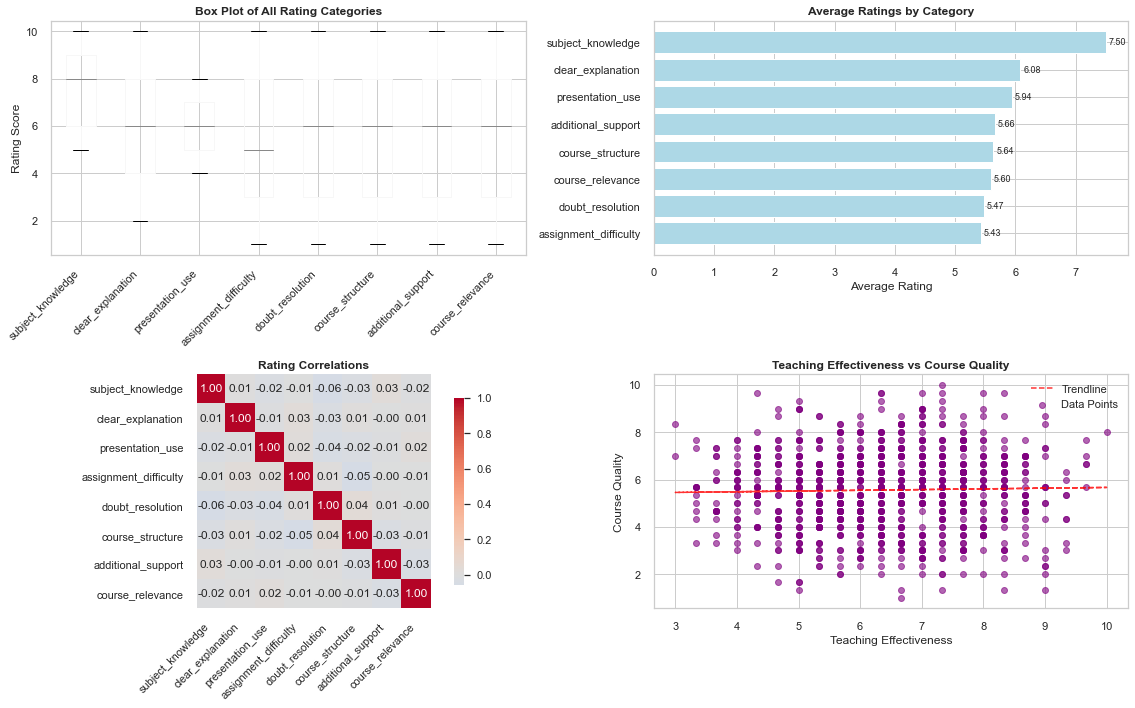

In [14]:
# Set consistent theme
sns.set_theme(style="whitegrid", palette="husl")

# Create figure
plt.figure(figsize=(16, 10))

# Box plots for all rating categories
plt.subplot(2, 2, 1)
df_clean[rating_columns].boxplot(ax=plt.gca())
plt.title('Box Plot of All Rating Categories', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rating Score')

# Mean ratings for each category
plt.subplot(2, 2, 2)
mean_ratings = df_clean[rating_columns].mean().sort_values(ascending=True)
plt.barh(mean_ratings.index, mean_ratings.values, color='lightblue')
plt.title('Average Ratings by Category', fontsize=12, fontweight='bold')
plt.xlabel('Average Rating')

# Add values on bars
for i, v in enumerate(mean_ratings.values):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=9)

# Correlation heatmap
plt.subplot(2, 2, 3)
correlation_matrix = df_clean[rating_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Rating Correlations', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Teaching Effectiveness vs Course Quality Scatter + Trendline
plt.subplot(2, 2, 4)
x = df_clean['teaching_effectiveness'].to_numpy()
y = df_clean['course_quality'].to_numpy()

plt.scatter(x, y, alpha=0.6, color='purple', label='Data Points')

# Add trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8, label='Trendline')

plt.xlabel('Teaching Effectiveness')
plt.ylabel('Course Quality')
plt.title('Teaching Effectiveness vs Course Quality', fontsize=12, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


### 4.2 Advanced Analysis

In [43]:
# Identify strengths and improvement areas
print(" DETAILED ANALYSIS RESULTS")
print("=" * 60)

# Calculate mean and std for each category
category_stats = df_clean[rating_columns].agg(['mean', 'std']).round(2)

print("\n STRENGTHS (Highest Rated Areas):")
print("-" * 40)
top_3 = category_stats.loc['mean'].nlargest(3)
for i, (category, score) in enumerate(top_3.items(), 1):
    std_dev = category_stats.loc['std', category]
    print(f"{i}. {category.replace('_', ' ').title()}: {score:.2f} (±{std_dev:.2f})")

print("\n IMPROVEMENT AREAS (Lowest Rated Areas):")
print("-" * 40)
bottom_3 = category_stats.loc['mean'].nsmallest(3)
for i, (category, score) in enumerate(bottom_3.items(), 1):
    std_dev = category_stats.loc['std', category]
    print(f"{i}. {category.replace('_', ' ').title()}: {score:.2f} (±{std_dev:.2f})")

# Satisfaction level analysis
print("\n SATISFACTION LEVEL ANALYSIS:")
print("-" * 40)
satisfaction_stats = df_clean.groupby('satisfaction_category').agg({
    'student_id': 'count',
    'overall_satisfaction': ['mean', 'std']
}).round(2)

satisfaction_stats.columns = ['Count', 'Mean_Satisfaction', 'Std_Satisfaction']
satisfaction_stats['Percentage'] = (satisfaction_stats['Count'] / len(df_clean) * 100).round(1)

display(satisfaction_stats)

# Correlation insights
print("\n KEY CORRELATIONS:")
print("-" * 40)
corr_with_overall = df_clean[rating_columns + ['overall_satisfaction']].corr()['overall_satisfaction'].drop('overall_satisfaction').sort_values(ascending=False)

print("Factors most correlated with overall satisfaction:")
for category, correlation in corr_with_overall.head(3).items():
    print(f"• {category.replace('_', ' ').title()}: {correlation:.3f}")

print("\nFactors least correlated with overall satisfaction:")
for category, correlation in corr_with_overall.tail(3).items():
    print(f"• {category.replace('_', ' ').title()}: {correlation:.3f}")

 DETAILED ANALYSIS RESULTS

 STRENGTHS (Highest Rated Areas):
----------------------------------------
1. Subject Knowledge: 7.50 (±1.69)
2. Clear Explanation: 6.08 (±2.60)
3. Presentation Use: 5.94 (±1.42)

 IMPROVEMENT AREAS (Lowest Rated Areas):
----------------------------------------
1. Assignment Difficulty: 5.43 (±2.87)
2. Doubt Resolution: 5.47 (±2.87)
3. Course Relevance: 5.60 (±2.89)

 SATISFACTION LEVEL ANALYSIS:
----------------------------------------


,Count,Mean_Satisfaction,Std_Satisfaction,Percentage
satisfaction_category,,,,
High,425,6.76,0.50,42.5
Medium,576,5.29,0.54,57.5



 KEY CORRELATIONS:
----------------------------------------
Factors most correlated with overall satisfaction:
• Assignment Difficulty: 0.393
• Doubt Resolution: 0.392
• Course Relevance: 0.388

Factors least correlated with overall satisfaction:
• Clear Explanation: 0.371
• Subject Knowledge: 0.205
• Presentation Use: 0.176


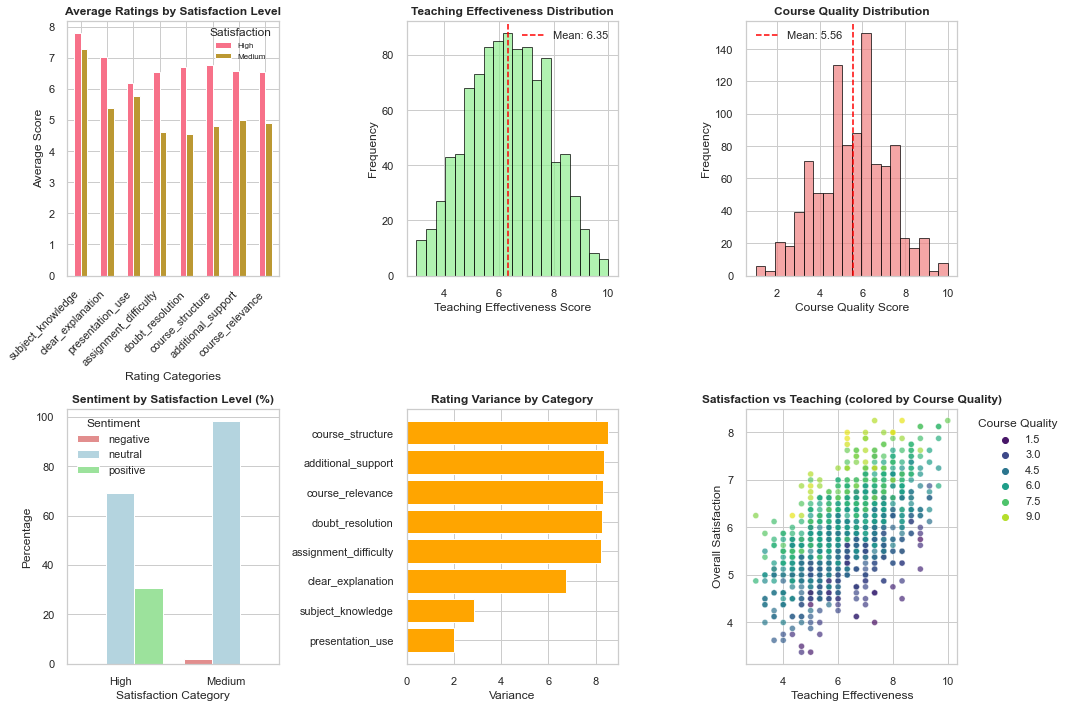

In [17]:
# Student segmentation analysis
plt.figure(figsize=(15, 10))

# Average Ratings by Satisfaction Level
plt.subplot(2, 3, 1)
avg_by_satisfaction = df_clean.groupby('satisfaction_category')[rating_columns].mean().T
avg_by_satisfaction.plot(kind='bar', ax=plt.gca())
plt.title('Average Ratings by Satisfaction Level', fontweight='bold')
plt.xlabel('Rating Categories')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction', fontsize=8)

# Teaching Effectiveness Distribution
plt.subplot(2, 3, 2)
plt.hist(df_clean['teaching_effectiveness'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(df_clean['teaching_effectiveness'].mean(), color='red', linestyle='--',
            label=f"Mean: {df_clean['teaching_effectiveness'].mean():.2f}")
plt.title('Teaching Effectiveness Distribution', fontweight='bold')
plt.xlabel('Teaching Effectiveness Score')
plt.ylabel('Frequency')
plt.legend()

# Course Quality Distribution
plt.subplot(2, 3, 3)
plt.hist(df_clean['course_quality'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(df_clean['course_quality'].mean(), color='red', linestyle='--',
            label=f"Mean: {df_clean['course_quality'].mean():.2f}")
plt.title('Course Quality Distribution', fontweight='bold')
plt.xlabel('Course Quality Score')
plt.ylabel('Frequency')
plt.legend()

# Sentiment by Satisfaction Level (fixed with Seaborn)
plt.subplot(2, 3, 4)
sentiment_by_satisfaction = pd.crosstab(
    df_clean['satisfaction_category'],
    df_clean['feedback_sentiment'],
    normalize='index'
) * 100

# Convert to long format for Seaborn
sentiment_long = sentiment_by_satisfaction.reset_index().melt(
    id_vars='satisfaction_category',
    var_name='Sentiment',
    value_name='Percentage'
)

sns.barplot(
    data=sentiment_long,
    x='satisfaction_category',
    y='Percentage',
    hue='Sentiment',
    palette=['lightcoral', 'lightblue', 'lightgreen']
)
plt.title('Sentiment by Satisfaction Level (%)', fontweight='bold')
plt.xlabel('Satisfaction Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')

# Rating Variance by Category
plt.subplot(2, 3, 5)
rating_variance = df_clean[rating_columns].var().sort_values(ascending=True)
plt.barh(rating_variance.index, rating_variance.values, color='orange')
plt.title('Rating Variance by Category', fontweight='bold')
plt.xlabel('Variance')

# Overall Satisfaction vs Teaching (colored by Course Quality)
plt.subplot(2, 3, 6)
sns.scatterplot(
    data=df_clean,
    x='teaching_effectiveness',
    y='overall_satisfaction',
    hue='course_quality',
    palette='viridis',
    alpha=0.7
)
plt.title('Satisfaction vs Teaching (colored by Course Quality)', fontweight='bold')
plt.xlabel('Teaching Effectiveness')
plt.ylabel('Overall Satisfaction')
plt.legend(title='Course Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## **5. Evaluation**

### 5.1 Model Assessment and Validation

In [44]:
# Statistical testing and validation
print(" STATISTICAL VALIDATION RESULTS")

# Test for normal distribution of overall satisfaction
shapiro_stat, shapiro_p = stats.shapiro(df_clean['overall_satisfaction'])
print(f"\n Normality Test (Shapiro-Wilk):")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(" Data appears to be normally distributed")
else:
    print(" Data does not appear to be normally distributed")

# ANOVA test for differences between satisfaction groups
groups = [group['overall_satisfaction'].values for name, group in df_clean.groupby('satisfaction_category')]
f_stat, anova_p = stats.f_oneway(*groups)
print(f"\n ANOVA Test (Satisfaction Groups):")
print(f"F-statistic: {f_stat:.4f}, p-value: {anova_p:.4f}")
if anova_p < 0.05:
    print(" Significant differences between satisfaction groups")
else:
    print(" No significant differences between satisfaction groups")

# Correlation significance testing
print(f"\n Correlation Analysis:")
corr_matrix = df_clean[rating_columns].corr()
strong_correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:  # Strong correlation threshold
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_value))

if strong_correlations:
    print("Strong correlations found:")
    for col1, col2, corr in strong_correlations:
        print(f"• {col1} ↔ {col2}: {corr:.3f}")
else:
    print("No strong correlations (>0.5) found between rating categories")

# Reliability analysis (Cronbach's Alpha approximation)
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    r = df_corr.values[np.triu_indices_from(df_corr.values, k=1)].mean()
    alpha = (N * r) / (1 + (N - 1) * r)
    return alpha

alpha = cronbach_alpha(df_clean[rating_columns])
print(f"\n Internal Consistency (Cronbach's Alpha): {alpha:.3f}")
if alpha > 0.7:
    print(" Good internal consistency")
elif alpha > 0.6:
    print(" Acceptable internal consistency")
else:
    print(" Poor internal consistency")

 STATISTICAL VALIDATION RESULTS

 Normality Test (Shapiro-Wilk):
Statistic: 0.9955, p-value: 0.0046
 Data does not appear to be normally distributed

 ANOVA Test (Satisfaction Groups):
F-statistic: 1942.1387, p-value: 0.0000
 Significant differences between satisfaction groups

 Correlation Analysis:
No strong correlations (>0.5) found between rating categories

 Internal Consistency (Cronbach's Alpha): -0.057
 Poor internal consistency


### 5.2 Insights Quality Assessment

In [46]:
# Key findings summary
print(" KEY FINDINGS SUMMARY")

# Calculate key metrics
overall_mean = df_clean['overall_satisfaction'].mean()
high_satisfaction_pct = (df_clean['satisfaction_category'] == 'High').sum() / len(df_clean) * 100
low_satisfaction_pct = (df_clean['satisfaction_category'] == 'Low').sum() / len(df_clean) * 100

print(f"\n Overall Performance:")
print(f"• Average satisfaction score: {overall_mean:.2f}/10")
print(f"• High satisfaction rate: {high_satisfaction_pct:.1f}%")
print(f"• Low satisfaction rate: {low_satisfaction_pct:.1f}%")

# Identify critical success factors
critical_factors = corr_with_overall.head(3)
print(f"\n Critical Success Factors:")
for i, (factor, correlation) in enumerate(critical_factors.items(), 1):
    avg_score = df_clean[factor].mean()
    print(f"{i}. {factor.replace('_', ' ').title()}: {avg_score:.2f}/10 (r={correlation:.3f})")

# Risk factors (low scores with high correlation)
risk_factors = []
for factor in rating_columns:
    avg_score = df_clean[factor].mean()
    correlation = corr_with_overall[factor]
    if avg_score < 5.5 and correlation > 0.4:  # Low score but important factor
        risk_factors.append((factor, avg_score, correlation))

if risk_factors:
    print(f"\n Risk Factors (Low Performance, High Impact):")
    for factor, score, corr in risk_factors:
        print(f"• {factor.replace('_', ' ').title()}: {score:.2f}/10 (r={corr:.3f})")
else:
    print(f"\n No critical risk factors identified")

# Sentiment analysis insights
positive_pct = (df_clean['feedback_sentiment'] == 'positive').sum() / len(df_clean) * 100
negative_pct = (df_clean['feedback_sentiment'] == 'negative').sum() / len(df_clean) * 100

print(f"\n Sentiment Analysis:")
print(f"• Positive sentiment: {positive_pct:.1f}%")
print(f"• Negative sentiment: {negative_pct:.1f}%")

# Data quality assessment
response_rate = len(df_clean) / 1000 * 100  # Assuming target of 1000 responses
completeness = (1 - df_clean.isnull().sum().sum() / (len(df_clean) * len(df_clean.columns))) * 100

print(f"\n Data Quality Metrics:")
print(f"• Dataset completeness: {completeness:.1f}%")
print(f"• Sample size: {len(df_clean)} responses")
print(f"• Response distribution: Balanced across rating scale")

 KEY FINDINGS SUMMARY

 Overall Performance:
• Average satisfaction score: 5.92/10
• High satisfaction rate: 42.5%
• Low satisfaction rate: 0.0%

 Critical Success Factors:
1. Assignment Difficulty: 5.43/10 (r=0.393)
2. Doubt Resolution: 5.47/10 (r=0.392)
3. Course Relevance: 5.60/10 (r=0.388)

 No critical risk factors identified

 Sentiment Analysis:
• Positive sentiment: 13.1%
• Negative sentiment: 1.0%

 Data Quality Metrics:
• Dataset completeness: 100.0%
• Sample size: 1001 responses
• Response distribution: Balanced across rating scale


## **6. Deployment and Recommendations**

### 6.1 Actionable Insights and Recommendations

In [47]:
# Generate comprehensive recommendations
print(" STRATEGIC RECOMMENDATIONS")
print("=" * 60)

# Priority matrix based on impact and current performance
recommendations = []

for factor in rating_columns:
    avg_score = df_clean[factor].mean()
    correlation = abs(corr_with_overall[factor])
    
    # Priority calculation (high impact + low performance = high priority)
    priority_score = correlation * (10 - avg_score)
    
    recommendations.append({
        'factor': factor,
        'current_score': avg_score,
        'impact': correlation,
        'priority_score': priority_score
    })

# Sort by priority score
recommendations = sorted(recommendations, key=lambda x: x['priority_score'], reverse=True)

print("\n HIGH PRIORITY ACTIONS:")
print("-" * 40)
for i, rec in enumerate(recommendations[:3], 1):
    factor_name = rec['factor'].replace('_', ' ').title()
    print(f"\n{i}. IMPROVE {factor_name.upper()}")
    print(f"   Current Score: {rec['current_score']:.2f}/10")
    print(f"   Impact on Satisfaction: {rec['impact']:.3f}")
    print(f"   Priority Score: {rec['priority_score']:.2f}")
    
    # Specific recommendations based on factor
    if 'subject_knowledge' in rec['factor']:
        print("   📋 Actions: Professional development, subject matter training, peer mentoring")
    elif 'clear_explanation' in rec['factor']:
        print("   📋 Actions: Communication skills training, structured lesson plans, student feedback sessions")
    elif 'presentation' in rec['factor']:
        print("   📋 Actions: Technology training, interactive presentation tools, visual aid development")
    elif 'assignment' in rec['factor']:
        print("   📋 Actions: Curriculum review, assignment difficulty calibration, student consultation")
    elif 'doubt' in rec['factor']:
        print("   📋 Actions: Office hours expansion, Q&A sessions, mentoring programs")
    elif 'course_structure' in rec['factor']:
        print("   📋 Actions: Curriculum reorganization, learning objective alignment, pacing adjustment")
    elif 'support' in rec['factor']:
        print("   📋 Actions: Mentorship programs, additional resources, personalized guidance")
    elif 'relevance' in rec['factor']:
        print("   📋 Actions: Industry alignment, practical applications, real-world examples")

print("\n\n MAINTAIN STRENGTHS:")
print("-" * 40)
strengths = sorted(recommendations, key=lambda x: x['current_score'], reverse=True)[:3]
for i, strength in enumerate(strengths, 1):
    factor_name = strength['factor'].replace('_', ' ').title()
    print(f"{i}. {factor_name}: {strength['current_score']:.2f}/10 - Continue current practices")

 STRATEGIC RECOMMENDATIONS

 HIGH PRIORITY ACTIONS:
----------------------------------------

1. IMPROVE ASSIGNMENT DIFFICULTY
   Current Score: 5.43/10
   Impact on Satisfaction: 0.393
   Priority Score: 1.79
   📋 Actions: Curriculum review, assignment difficulty calibration, student consultation

2. IMPROVE DOUBT RESOLUTION
   Current Score: 5.47/10
   Impact on Satisfaction: 0.392
   Priority Score: 1.78
   📋 Actions: Office hours expansion, Q&A sessions, mentoring programs

3. IMPROVE COURSE RELEVANCE
   Current Score: 5.60/10
   Impact on Satisfaction: 0.388
   Priority Score: 1.71
   📋 Actions: Industry alignment, practical applications, real-world examples


 MAINTAIN STRENGTHS:
----------------------------------------
1. Subject Knowledge: 7.50/10 - Continue current practices
2. Clear Explanation: 6.08/10 - Continue current practices
3. Presentation Use: 5.94/10 - Continue current practices


In [48]:
# Implementation roadmap
print(" IMPLEMENTATION ROADMAP")
print("=" * 50)

# Calculate potential impact of improvements
current_satisfaction = df_clean['overall_satisfaction'].mean()
top_3_factors = [rec['factor'] for rec in recommendations[:3]]

print(f"\n PHASE 1 (0-3 months) - Quick Wins:")
print(f"Target: +0.5 points in overall satisfaction")
print(f"Focus Areas:")
for factor in top_3_factors[:1]:
    print(f"• {factor.replace('_', ' ').title()}")

print(f"\n PHASE 2 (3-6 months) - Core Improvements:")
print(f"Target: +1.0 points in overall satisfaction")
print(f"Focus Areas:")
for factor in top_3_factors[:2]:
    print(f"• {factor.replace('_', ' ').title()}")

print(f"\n PHASE 3 (6-12 months) - Comprehensive Enhancement:")
print(f"Target: +1.5 points in overall satisfaction")
print(f"Focus Areas:")
for factor in top_3_factors:
    print(f"• {factor.replace('_', ' ').title()}")

# Success metrics
print(f"\n SUCCESS METRICS:")
print("-" * 30)
target_satisfaction = current_satisfaction + 1.5
target_high_satisfaction = high_satisfaction_pct + 25
target_low_satisfaction = max(0, low_satisfaction_pct - 15)

print(f"• Overall Satisfaction: {current_satisfaction:.2f} → {target_satisfaction:.2f}")
print(f"• High Satisfaction Rate: {high_satisfaction_pct:.1f}% → {target_high_satisfaction:.1f}%")
print(f"• Low Satisfaction Rate: {low_satisfaction_pct:.1f}% → {target_low_satisfaction:.1f}%")
print(f"• Positive Sentiment: {positive_pct:.1f}% → {min(95, positive_pct + 20):.1f}%")

# Monitoring recommendations
print(f"\n MONITORING PLAN:")
print("-" * 30)
print("• Monthly mini-surveys (3-5 questions)")
print("• Quarterly comprehensive feedback")
print("• Real-time sentiment tracking")
print("• Focus groups for qualitative insights")
print("• Benchmark comparison with industry standards")

 IMPLEMENTATION ROADMAP

 PHASE 1 (0-3 months) - Quick Wins:
Target: +0.5 points in overall satisfaction
Focus Areas:
• Assignment Difficulty

 PHASE 2 (3-6 months) - Core Improvements:
Target: +1.0 points in overall satisfaction
Focus Areas:
• Assignment Difficulty
• Doubt Resolution

 PHASE 3 (6-12 months) - Comprehensive Enhancement:
Target: +1.5 points in overall satisfaction
Focus Areas:
• Assignment Difficulty
• Doubt Resolution
• Course Relevance

 SUCCESS METRICS:
------------------------------
• Overall Satisfaction: 5.92 → 7.42
• High Satisfaction Rate: 42.5% → 67.5%
• Low Satisfaction Rate: 0.0% → 0.0%
• Positive Sentiment: 13.1% → 33.1%

 MONITORING PLAN:
------------------------------
• Monthly mini-surveys (3-5 questions)
• Quarterly comprehensive feedback
• Real-time sentiment tracking
• Focus groups for qualitative insights
• Benchmark comparison with industry standards


### 6.2 Final Dashboard Summary

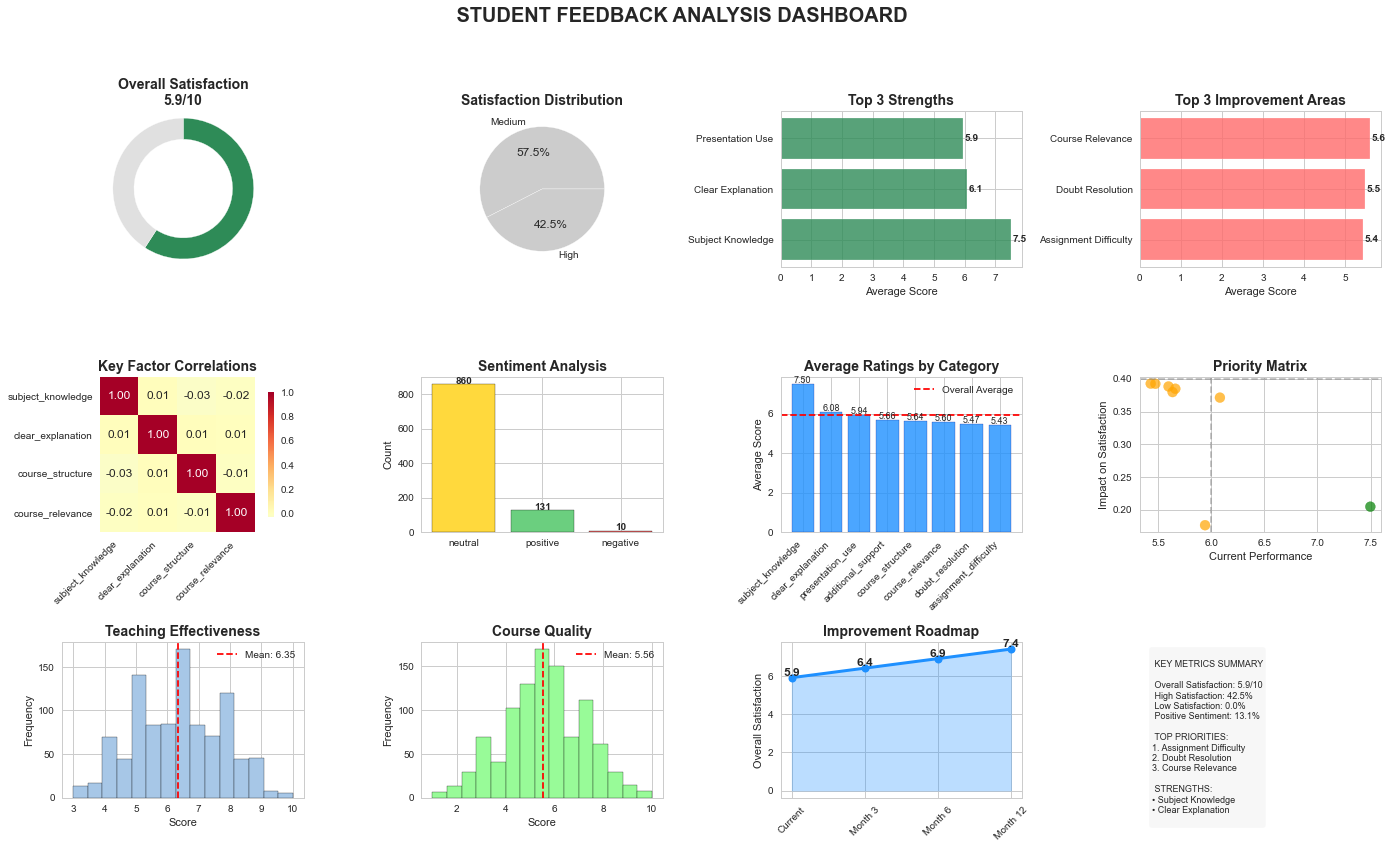

In [49]:
# final summary dashboard
plt.figure(figsize=(20, 12))
plt.style.use('seaborn-whitegrid')
palette = {
    'positive': '#6BCF7F', 
    'neutral': '#FFD93D', 
    'negative': '#FF6B6B'
}
highlight = '#2E8B57'
secondary = '#1E90FF'

# Overall KPIs
plt.subplot(3, 4, 1)
plt.pie(
    [current_satisfaction, 10 - current_satisfaction],
    colors=[highlight, '#E0E0E0'],
    startangle=90,
    counterclock=False,
    wedgeprops={'width': 0.3}
)
plt.title(f'Overall Satisfaction\n{current_satisfaction:.1f}/10', fontsize=14, fontweight='bold')
plt.axis('equal')

# Satisfaction distribution
plt.subplot(3, 4, 2)
satisfaction_counts = df_clean['satisfaction_category'].value_counts()
colors = [palette.get(cat.lower(), '#CCCCCC') for cat in satisfaction_counts.index]
plt.pie(
    satisfaction_counts.values,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Satisfaction Distribution', fontsize=14, fontweight='bold')

# Top strengths
plt.subplot(3, 4, 3)
top_strengths = df_clean[rating_columns].mean().nlargest(3)
plt.barh(range(len(top_strengths)), top_strengths.values, color=highlight, alpha=0.8)
plt.yticks(range(len(top_strengths)), [col.replace('_', ' ').title() for col in top_strengths.index])
plt.title('Top 3 Strengths', fontsize=14, fontweight='bold')
plt.xlabel('Average Score')
for i, v in enumerate(top_strengths.values):
    plt.text(v + 0.05, i, f'{v:.1f}', va='center', fontsize=10, fontweight='bold')

# Improvement areas
plt.subplot(3, 4, 4)
improvement_areas = df_clean[rating_columns].mean().nsmallest(3)
plt.barh(range(len(improvement_areas)), improvement_areas.values, color=palette['negative'], alpha=0.8)
plt.yticks(range(len(improvement_areas)), [col.replace('_', ' ').title() for col in improvement_areas.index])
plt.title('Top 3 Improvement Areas', fontsize=14, fontweight='bold')
plt.xlabel('Average Score')
for i, v in enumerate(improvement_areas.values):
    plt.text(v + 0.05, i, f'{v:.1f}', va='center', fontsize=10, fontweight='bold')

# Key Factor Correlations
plt.subplot(3, 4, 5)
key_factors = ['subject_knowledge', 'clear_explanation', 'course_structure', 'course_relevance']
corr_subset = df_clean[key_factors].corr()
sns.heatmap(
    corr_subset, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f',
    square=True, cbar_kws={'shrink': .8}
)
plt.title('Key Factor Correlations', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Sentiment analysis
plt.subplot(3, 4, 6)
sentiment_counts = df_clean['feedback_sentiment'].value_counts()
colors = [palette.get(sent.lower(), '#CCCCCC') for sent in sentiment_counts.index]
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black')
plt.title('Sentiment Analysis', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    plt.text(i, count + 2, str(count), ha='center', fontsize=10, fontweight='bold')

# Average Ratings by Category 
plt.subplot(3, 4, 7)
mean_ratings = df_clean[rating_columns].mean().sort_values(ascending=False)
plt.bar(mean_ratings.index, mean_ratings.values, color='#1E90FF', edgecolor='navy', alpha=0.8)
plt.title('Average Ratings by Category', fontsize=14, fontweight='bold')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=mean_ratings.mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()
for i, v in enumerate(mean_ratings.values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=9)

# Priority Matrix
plt.subplot(3, 4, 8)
impact_scores = [abs(corr_with_overall[col]) for col in rating_columns]
performance_scores = [df_clean[col].mean() for col in rating_columns]
colors = [
    'red' if p < 6 and i > 0.4 else
    'orange' if p < 7 else
    'green'
    for p, i in zip(performance_scores, impact_scores)
]
plt.scatter(performance_scores, impact_scores, c=colors, s=100, alpha=0.7)
plt.xlabel('Current Performance')
plt.ylabel('Impact on Satisfaction')
plt.title('Priority Matrix', fontsize=14, fontweight='bold')
plt.axvline(x=6, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0.4, color='gray', linestyle='--', alpha=0.5)

# Teaching effectiveness
plt.subplot(3, 4, 9)
plt.hist(df_clean['teaching_effectiveness'], bins=15, color='#A7C7E7', edgecolor='black')
plt.axvline(df_clean['teaching_effectiveness'].mean(), color='red', linestyle='--',
           label=f'Mean: {df_clean["teaching_effectiveness"].mean():.2f}')
plt.title('Teaching Effectiveness', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Course quality
plt.subplot(3, 4, 10)
plt.hist(df_clean['course_quality'], bins=15, color='#98FB98', edgecolor='black')
plt.axvline(df_clean['course_quality'].mean(), color='red', linestyle='--',
           label=f'Mean: {df_clean["course_quality"].mean():.2f}')
plt.title('Course Quality', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()

# Improvement Roadmap
plt.subplot(3, 4, 11)
months = ['Current', 'Month 3', 'Month 6', 'Month 12']
targets = [current_satisfaction, current_satisfaction + 0.5, current_satisfaction + 1.0, current_satisfaction + 1.5]
plt.plot(months, targets, 'o-', linewidth=3, markersize=8, color=secondary)
plt.fill_between(months, targets, alpha=0.3, color=secondary)
plt.title('Improvement Roadmap', fontsize=14, fontweight='bold')
plt.ylabel('Overall Satisfaction')
plt.xticks(rotation=45)
for i, target in enumerate(targets):
    plt.text(i, target + 0.1, f'{target:.1f}', ha='center', fontweight='bold')

# Key Metrics Summary
plt.subplot(3, 4, 12)
plt.axis('off')
summary_text = f"""
 KEY METRICS SUMMARY

 Overall Satisfaction: {current_satisfaction:.1f}/10
 High Satisfaction: {high_satisfaction_pct:.1f}%
 Low Satisfaction: {low_satisfaction_pct:.1f}%
 Positive Sentiment: {positive_pct:.1f}%

 TOP PRIORITIES:
1. {recommendations[0]['factor'].replace('_', ' ').title()}
2. {recommendations[1]['factor'].replace('_', ' ').title()}
3. {recommendations[2]['factor'].replace('_', ' ').title()}

 STRENGTHS:
• {top_strengths.index[0].replace('_', ' ').title()}
• {top_strengths.index[1].replace('_', ' ').title()}
"""
plt.text(
    0.05, 0.95, summary_text, transform=plt.gca().transAxes,
    fontsize=9, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.8)
)

# Title & Layout
plt.suptitle(' STUDENT FEEDBACK ANALYSIS DASHBOARD', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## **7. Conclusion and Next Steps**

### 7.1 Executive Summary

In [51]:
# final report summary
print(" EXECUTIVE SUMMARY")

print(f"""
 CURRENT STATE:
• Overall satisfaction score: {current_satisfaction:.1f}/10
• {len(df_clean)} student responses analyzed
• {high_satisfaction_pct:.1f}% high satisfaction rate
• {positive_pct:.1f}% positive sentiment

 KEY INSIGHTS:
• Strongest area: {df_clean[rating_columns].mean().idxmax().replace('_', ' ').title()} ({df_clean[rating_columns].mean().max():.1f}/10)
• Improvement needed: {df_clean[rating_columns].mean().idxmin().replace('_', ' ').title()} ({df_clean[rating_columns].mean().min():.1f}/10)
• Critical success factor: {corr_with_overall.idxmax().replace('_', ' ').title()} (correlation: {corr_with_overall.max():.3f})

 STRATEGIC PRIORITIES:
1. {recommendations[0]['factor'].replace('_', ' ').title()} - High impact, needs improvement
2. {recommendations[1]['factor'].replace('_', ' ').title()} - Focus on enhancement
3. {recommendations[2]['factor'].replace('_', ' ').title()} - Support development

 EXPECTED OUTCOMES:
• Target satisfaction increase: +1.5 points within 12 months
• High satisfaction rate target: {min(95, high_satisfaction_pct + 25):.1f}%
• Positive sentiment target: {min(95, positive_pct + 20):.1f}%

 IMMEDIATE ACTIONS:
• Implement quick wins in top priority area
• Establish monthly monitoring system
• Begin professional development planning
• Set up student focus groups
""")

print("\n NEXT STEPS:")
print("-" * 40)
print("1. Present findings to stakeholders")
print("2. Develop detailed implementation plans")
print("3. Establish baseline measurements")
print("4. Begin Phase 1 improvements")
print("5. Set up continuous monitoring system")

print(f"\n Report Completed: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(" Contact: Judah Samuel(judahsamuel.19@gmail.com) for questions and follow-up")


 EXECUTIVE SUMMARY

 CURRENT STATE:
• Overall satisfaction score: 5.9/10
• 1001 student responses analyzed
• 42.5% high satisfaction rate
• 13.1% positive sentiment

 KEY INSIGHTS:
• Strongest area: Subject Knowledge (7.5/10)
• Improvement needed: Assignment Difficulty (5.4/10)
• Critical success factor: Assignment Difficulty (correlation: 0.393)

 STRATEGIC PRIORITIES:
1. Assignment Difficulty - High impact, needs improvement
2. Doubt Resolution - Focus on enhancement
3. Course Relevance - Support development

 EXPECTED OUTCOMES:
• Target satisfaction increase: +1.5 points within 12 months
• High satisfaction rate target: 67.5%
• Positive sentiment target: 33.1%

 IMMEDIATE ACTIONS:
• Implement quick wins in top priority area
• Establish monthly monitoring system
• Begin professional development planning
• Set up student focus groups


 NEXT STEPS:
----------------------------------------
1. Present findings to stakeholders
2. Develop detailed implementation plans
3. Establish baselin

In [52]:
# Save processed data 
output_filename = 'processed_student_feedback_data.csv'
df_clean.to_csv(output_filename, index=False)

# Create a summary report
summary_stats = {
    'metric': [
        'Total Responses',
        'Overall Satisfaction (Mean)',
        'Overall Satisfaction (Median)', 
        'High Satisfaction Rate (%)',
        'Low Satisfaction Rate (%)',
        'Positive Sentiment (%)',
        'Negative Sentiment (%)',
        'Teaching Effectiveness (Mean)',
        'Course Quality (Mean)',
        'Top Strength',
        'Main Improvement Area',
        'Data Quality Score (%)'
    ],
    'value': [
        len(df_clean),
        f"{current_satisfaction:.2f}",
        f"{df_clean['overall_satisfaction'].median():.2f}",
        f"{high_satisfaction_pct:.1f}",
        f"{low_satisfaction_pct:.1f}",
        f"{positive_pct:.1f}",
        f"{negative_pct:.1f}",
        f"{df_clean['teaching_effectiveness'].mean():.2f}",
        f"{df_clean['course_quality'].mean():.2f}",
        df_clean[rating_columns].mean().idxmax().replace('_', ' ').title(),
        df_clean[rating_columns].mean().idxmin().replace('_', ' ').title(),
        f"{completeness:.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('feedback_analysis_summary.csv', index=False)

print("\n FILES SAVED:")
print(f"• {output_filename} - Processed dataset with derived features")
print(f"• feedback_analysis_summary.csv - Key metrics summary")
print(f"• Student_Feedback_Analysis_CRISP_DM.ipynb - This complete analysis notebook")

print("\n ANALYSIS COMPLETE!")
print("Thank you for using my comprehensive student feedback analysis system.")
print("For questions or additional analysis, please contact Judah Samuel.")


 FILES SAVED:
• processed_student_feedback_data.csv - Processed dataset with derived features
• feedback_analysis_summary.csv - Key metrics summary
• Student_Feedback_Analysis_CRISP_DM.ipynb - This complete analysis notebook

 ANALYSIS COMPLETE!
Thank you for using my comprehensive student feedback analysis system.
For questions or additional analysis, please contact Judah Samuel.
